# 3 - Machine Learning

## 3.1 - Importing Python Modules

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

## 3.2 - Data preparation

In [2]:
# Importing the CSV
df_initial = pd.read_csv('Telco_Customer_Churn.csv')
df_initial.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Converting Total Charges to a numerical data type and check for Null entries
df_initial.TotalCharges = pd.to_numeric(df_initial.TotalCharges, errors='coerce')
df_initial.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
print(len(df_initial))

7043


There are a total of 7043 rows in the full dataset, with 11 missing values in TotalCharges. Hence, for 11 rows out of 7043 rows (0.17%) with missing values, 7043 - 11 = 7032 rows of data left to build a classification tree is plentiful. Therefore, we will be removing these 11 rows. 

In [5]:
# Removing the 11 missing entries 
df_initial.dropna(inplace = True)
print(len(df_initial))

7032


In [6]:
# To check there are no more NULL entries
df_initial.TotalCharges = pd.to_numeric(df_initial.TotalCharges, errors='coerce')
df_initial.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Remove customer ID from dataset
df = df_initial.iloc[:,1:]

# Convert predictor variable (Churn) into a binary (1/0) numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [8]:
# Convert all the categorical variables into dummy variables
df_dummy = pd.get_dummies(df, dtype=int)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

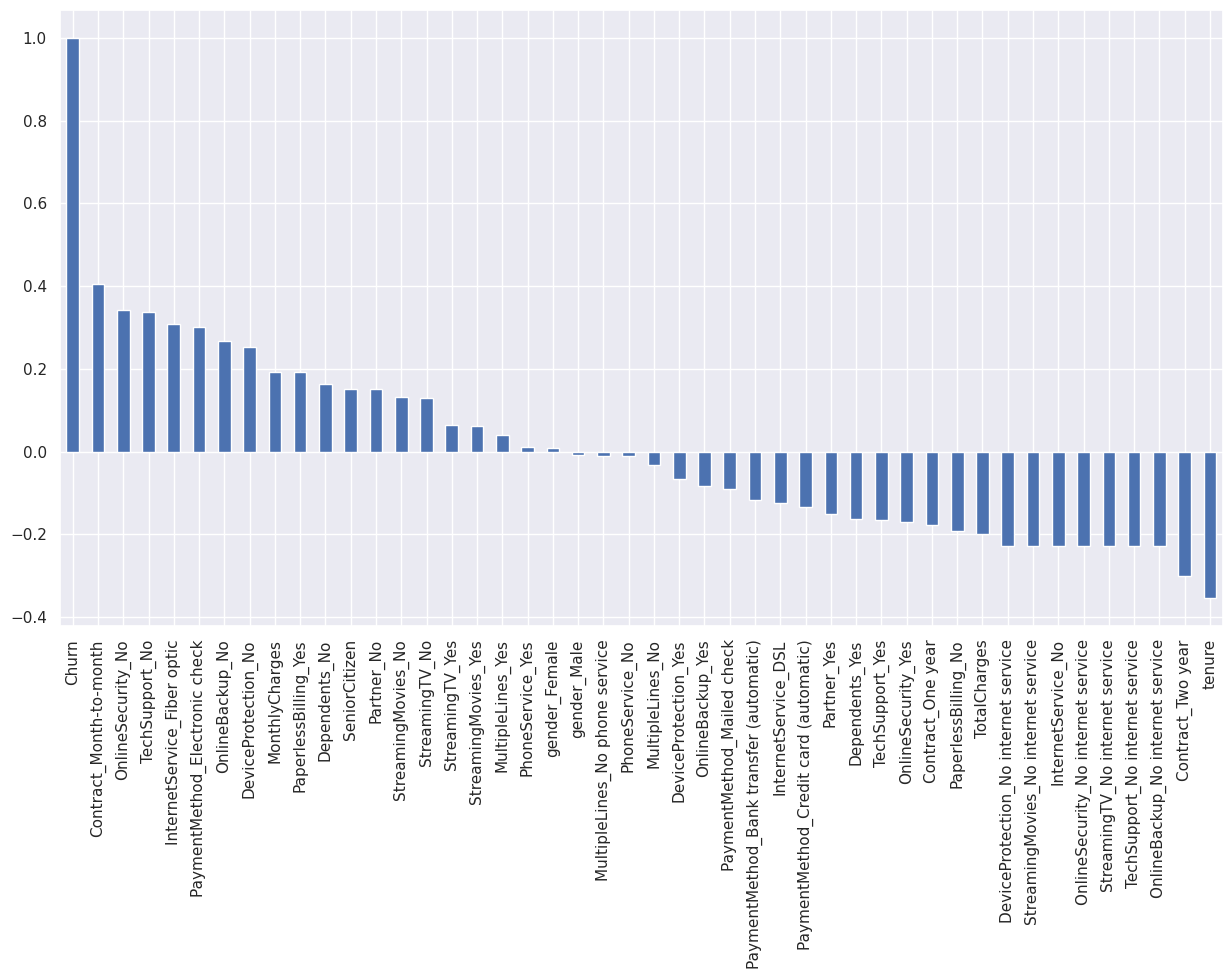

In [9]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

The `top 3` variables that is `positively related` to Churn:
1. Contract_Month-to-month
2. OnlineSecurity_No
3. TechSupport_No

The `top 3` variables that is `negatively related` to Churn:
1. tenure
2. Contract_Two year
3. OnlineBackup_No internet service

**Therefore, we will be using `Contract`, `Tenure`, `OnlineSecurity`, `OnlineBackup` and `TechSupport` to predict Churn.**

In [10]:
# Downsampling using majority class method

# Split the DataFrame into majority and minority classes
df_majority = df_dummy[df_dummy.Churn == 0]
df_minority = df_dummy[df_dummy.Churn == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # match minority class
                                   random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame
df_downsampled = df_downsampled.sample(frac=1, random_state=123).reset_index(drop=True)

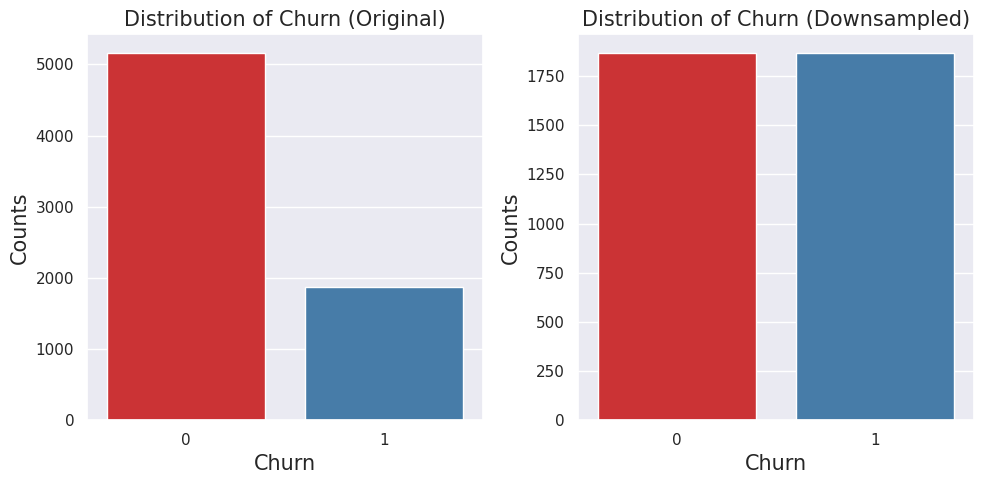

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Total figure size for both plots

# Graph 1: Distribution of churn for the original dataset
churn_cnt = df.Churn.value_counts()
sb.barplot(x=churn_cnt.index, y=churn_cnt.values, ax=axes[0], hue=churn_cnt.index, palette='Set1', legend=False)  # Set hue and legend=False

axes[0].set_xlabel("Churn", fontsize=15)
axes[0].set_ylabel("Counts", fontsize=15)
axes[0].set_title("Distribution of Churn (Original)", fontsize=15)

# Graph 2: Distribution of churn for the downsampled dataset
churn_cnt_downsampled = df_downsampled.Churn.value_counts()
sb.barplot(x=churn_cnt_downsampled.index, y=churn_cnt_downsampled.values, ax=axes[1], hue=churn_cnt_downsampled.index, palette='Set1', legend=False)

axes[1].set_xlabel("Churn", fontsize=15)
axes[1].set_ylabel("Counts", fontsize=15)
axes[1].set_title("Distribution of Churn (Downsampled)", fontsize=15)

plt.tight_layout()  # Adjusts subplots to fit in the figure area
plt.show()

Downsampling makes the dataset less biased

## 3.3 - Predicting Churn using variable

In [12]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [13]:
# Grouping based on EDA
def displayChurnVsTenureSummary(df):
    # Determine the maximum tenure to define bin edges dynamically
    max_tenure = df['tenure'].max()
    bin_width = 12  # Define the width of each bin
    num_bins = np.ceil(max_tenure / bin_width).astype(int)  # Calculate the number of bins required
    
    # Generate bin edges and labels dynamically
    bins = [i * bin_width for i in range(num_bins + 1)]
    labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
    
    df['Tenure Group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False, include_lowest=True)

def displayChurnByMonthlyChargeGroups(df):
    # Ensure charges_column is numeric, converting if necessary
    df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
    
    # Calculate bins and labels
    min_charge = df['MonthlyCharges'].min()
    max_charge = df['MonthlyCharges'].max()
    bin_width = (max_charge - min_charge) / 5  
    bins = np.arange(min_charge, max_charge + bin_width, bin_width)
    bin_labels = [f'{round(bins[i], 2)} - {round(bins[i+1], 2)}' for i in range(len(bins)-1)]

    # Bin the charges into categories
    df['MonthlyCharges Group'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=bin_labels, right=False)

def displayChurnByTotalChargeGroups(df):
    # Ensure charges_column is numeric, converting if necessary
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Calculate bins and labels
    min_charge = df['TotalCharges'].min()
    max_charge = df['TotalCharges'].max()
    bin_width = (max_charge - min_charge) / 5  
    bins = np.arange(min_charge, max_charge + bin_width, bin_width)
    bin_labels = [f'{round(bins[i], 2)} - {round(bins[i+1], 2)}' for i in range(len(bins)-1)]

    # Bin the charges into categories
    df['TotalCharges Group'] = pd.cut(df['TotalCharges'], bins=bins, labels=bin_labels, right=False)

In [14]:
# Run
displayChurnVsTenureSummary(df_downsampled)
displayChurnByMonthlyChargeGroups(df_downsampled)
displayChurnByTotalChargeGroups(df_downsampled)

## 3.4 - Model 1: Comparison between 1 variable and Churn

In [15]:
df_downsampled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Group,MonthlyCharges Group,TotalCharges Group
0,0,29,75.30,2263.40,0,0,1,0,1,1,...,0,0,1,0,1,0,0,24-36,58.54 - 78.61,1752.0 - 3485.2
1,0,55,55.25,3119.90,0,0,1,0,1,0,...,1,0,1,0,1,0,0,48-60,38.47 - 58.54,1752.0 - 3485.2
2,0,3,24.75,66.95,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0-12,18.4 - 38.47,18.8 - 1752.0
3,1,37,36.65,1315.00,0,0,1,1,0,1,...,0,1,0,0,0,1,0,36-48,18.4 - 38.47,18.8 - 1752.0
4,0,53,85.45,4517.25,1,0,1,1,0,1,...,0,1,0,1,0,0,0,48-60,78.61 - 98.68,3485.2 - 5218.4


In [16]:
def do_ct_cm(v1, v2):
    # Split the Dataset into Train and Test
    v1_train, v1_test, v2_train, v2_test = train_test_split(v1, v2, test_size = 0.2)
    
    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = 3)
    
    # Train the Decision Tree Classifier model
    dectree.fit(v1_train, v2_train)
    
    # Plot the trained Decision Tree
    f = plt.figure(figsize=(30,15))
    plot_tree(dectree,             
              feature_names = v1.columns,
              class_names=['Does not Churn', 'Churn'], 
              filled=True, rounded=True)
    print()

    # Predict v2 corresponding to v1 Test
    v2_test_pred = dectree.predict(v1_test)
    
    # Print the Classification Accuracy
    print("Classification Accuracy \t:", dectree.score(v1_test, v2_test))
    
    # Plot the two-way Confusion Matrix
    f, axes = plt.subplots(1, figsize=(7, 5))
    sb.heatmap(confusion_matrix(v2_test, v2_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes)
               
    # labels, title and ticks
    axes.set_xlabel('Predicted labels'); axes.set_ylabel('True labels'); 
    axes.set_title('Confusion Matrix'); 
    axes.xaxis.set_ticklabels(['Does not Churn', 'Churn'])
    axes.yaxis.set_ticklabels(['Does not Churn', 'Churn'])

### 3.4.1 - Categorical variable: Contract

In [17]:
# find out the different 
contract = df[['Contract']]
contract_col = pd.get_dummies(contract)
contract_col.columns

Index(['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'], dtype='object')

We used the `get_dummies()` to convert the variables into a dataframe with 1 (True) and 0 (False), which makes it easier to check that it works as intended. Afterwards, we use these discrete values to plot the classification tree.

In [18]:
# Cleaning of data
Churn = pd.DataFrame(df_downsampled['Churn'])        # Response
model_1_contract = df_downsampled[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']]        # Predictor

model_1_contract_encoded = pd.get_dummies(model_1_contract)
model_1_contract_encoded.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0



Classification Accuracy 	: 0.7473262032085561


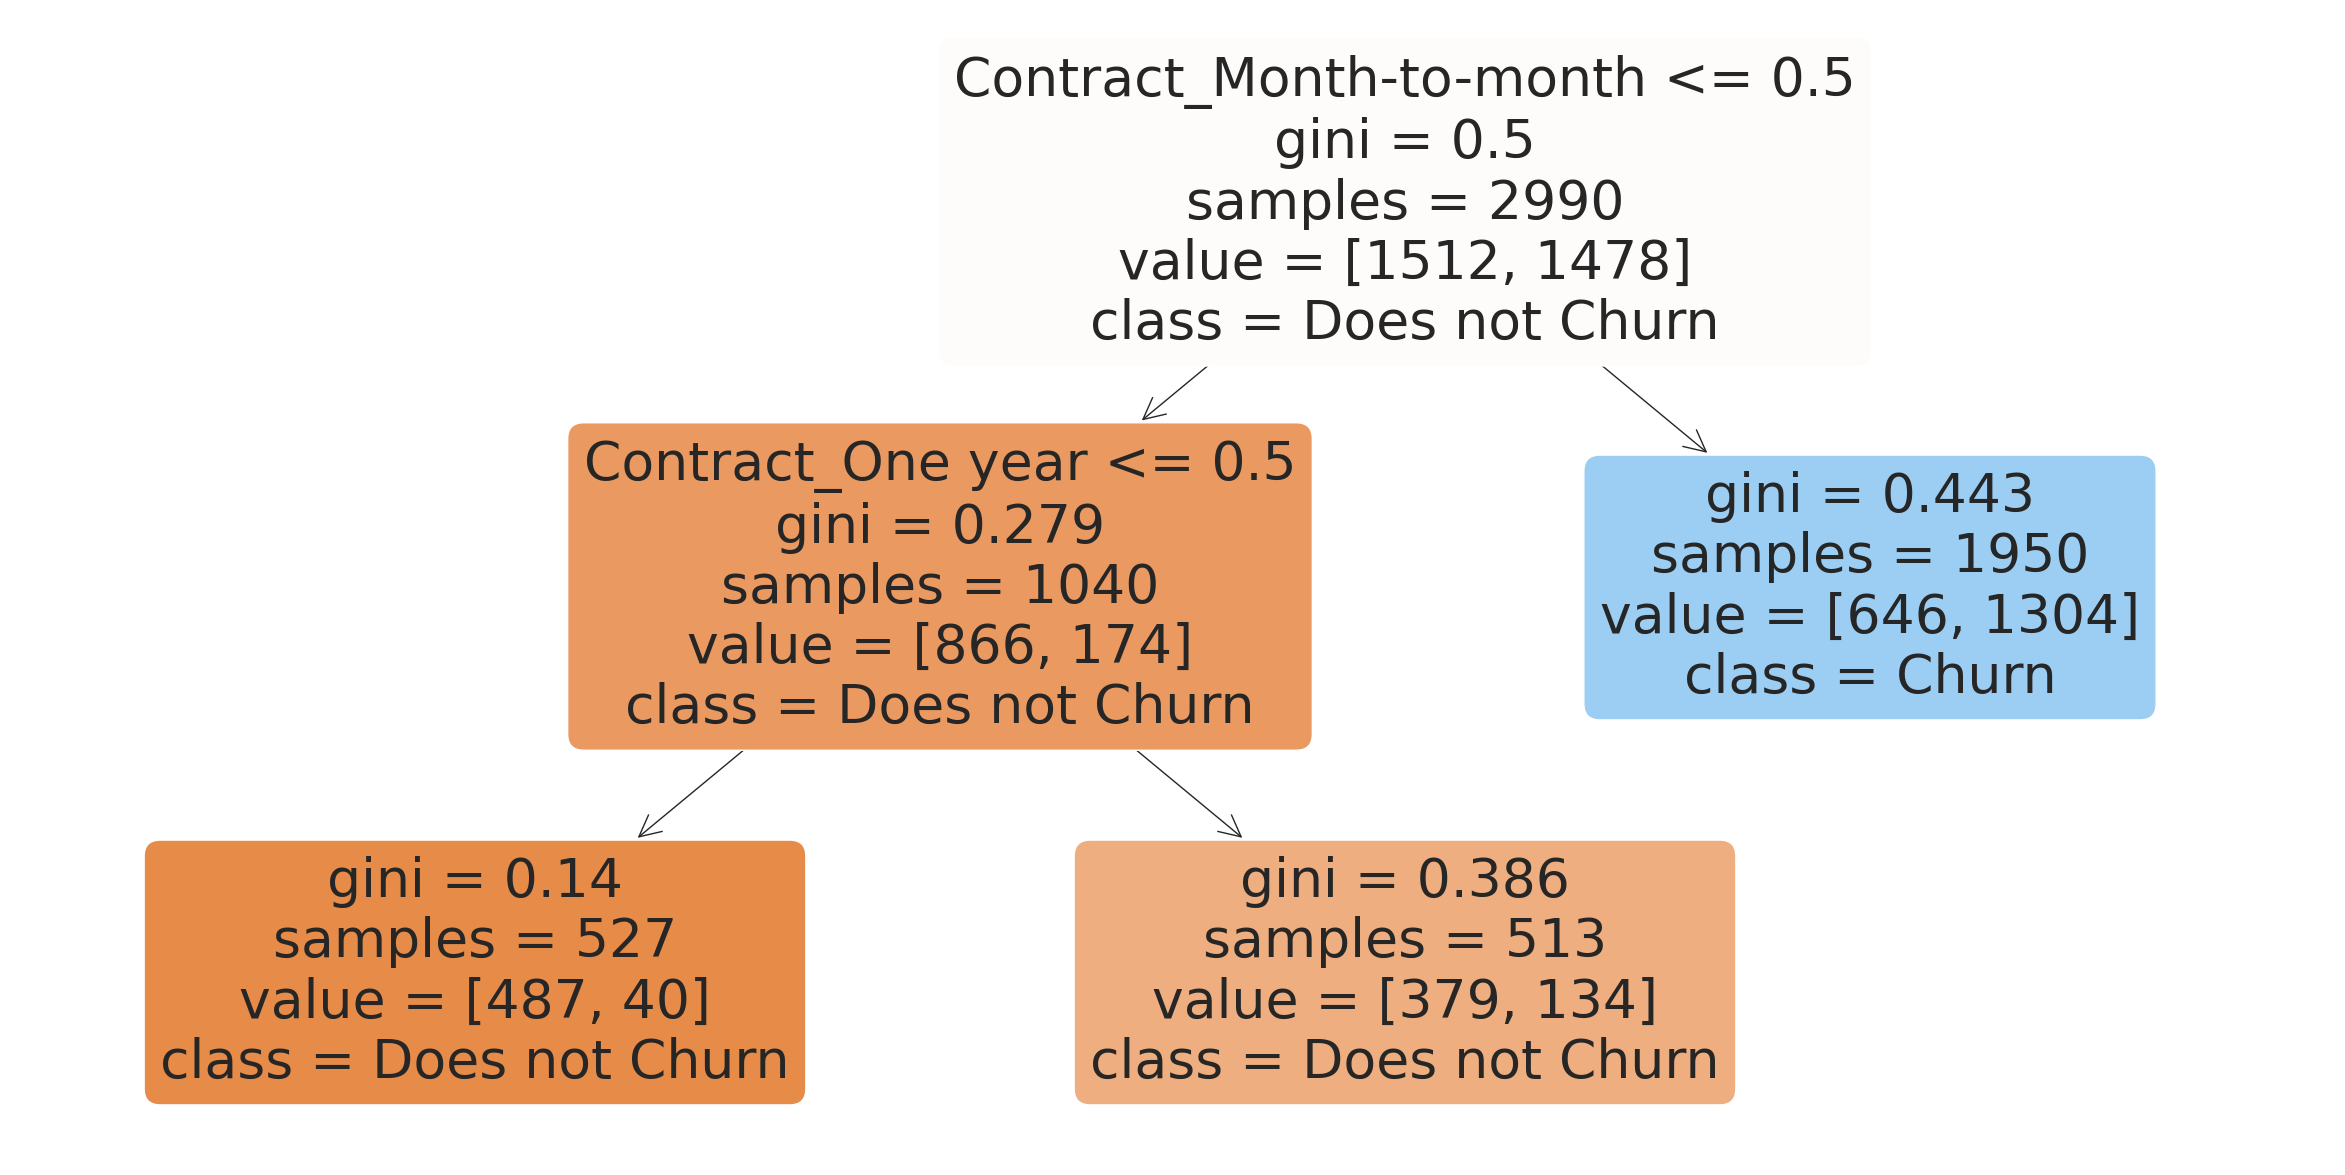

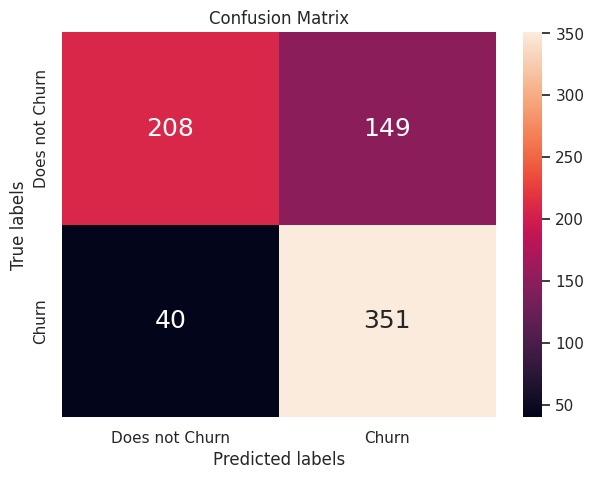

In [19]:
do_ct_cm(model_1_contract_encoded, Churn)

**Logic:** The lower the Gini Index, the more confident the node is in predicting "Churn". The more the drop in Gini from a parent node to the children node, the better is the split. The tree automatically decides the best variables by splitting the tree using them. Thus, the higher the variable occurs
in a tree, the more important it is. 

**Conclusion:** `Contract_Month-to-month` is the most important in predicting "Churn" as compared to Contract_One year and Contract_Two year as it occurs in the very first split of the tree and leads to the greatest drop in Gini as seen from the children node where gini = 0.279, a drop of 0.221 as compared to the parent node with Gini = 0.5.

In [42]:
print("Contract_Month-to-month Model")
print()

# True Positive Rate = TP/(TP+FN)
print("True Positive Rate for Test Data \t:", 351 / (351 + 40))

# False Positive Rate = FP/(FP+TN)
print("False Positive Rate for Test Data \t:", 149 / (149 + 208))

Contract_Month-to-month Model

True Positive Rate for Test Data 	: 0.8976982097186701
False Positive Rate for Test Data 	: 0.4173669467787115


### 3.4.2 - Categorical variable: Tenure

In [21]:
# Cleaning of data
Churn = pd.DataFrame(df_downsampled['Churn'])        # Response
model_1_tenure = df_downsampled[['Tenure Group']]        # Predictor

model_1_tenure_encoded = pd.get_dummies(model_1_tenure, dtype = int)
model_1_tenure_encoded.head()

,Tenure Group_0-12,Tenure Group_12-24,Tenure Group_24-36,Tenure Group_36-48,Tenure Group_48-60,Tenure Group_60-72
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0



Classification Accuracy 	: 0.6751336898395722


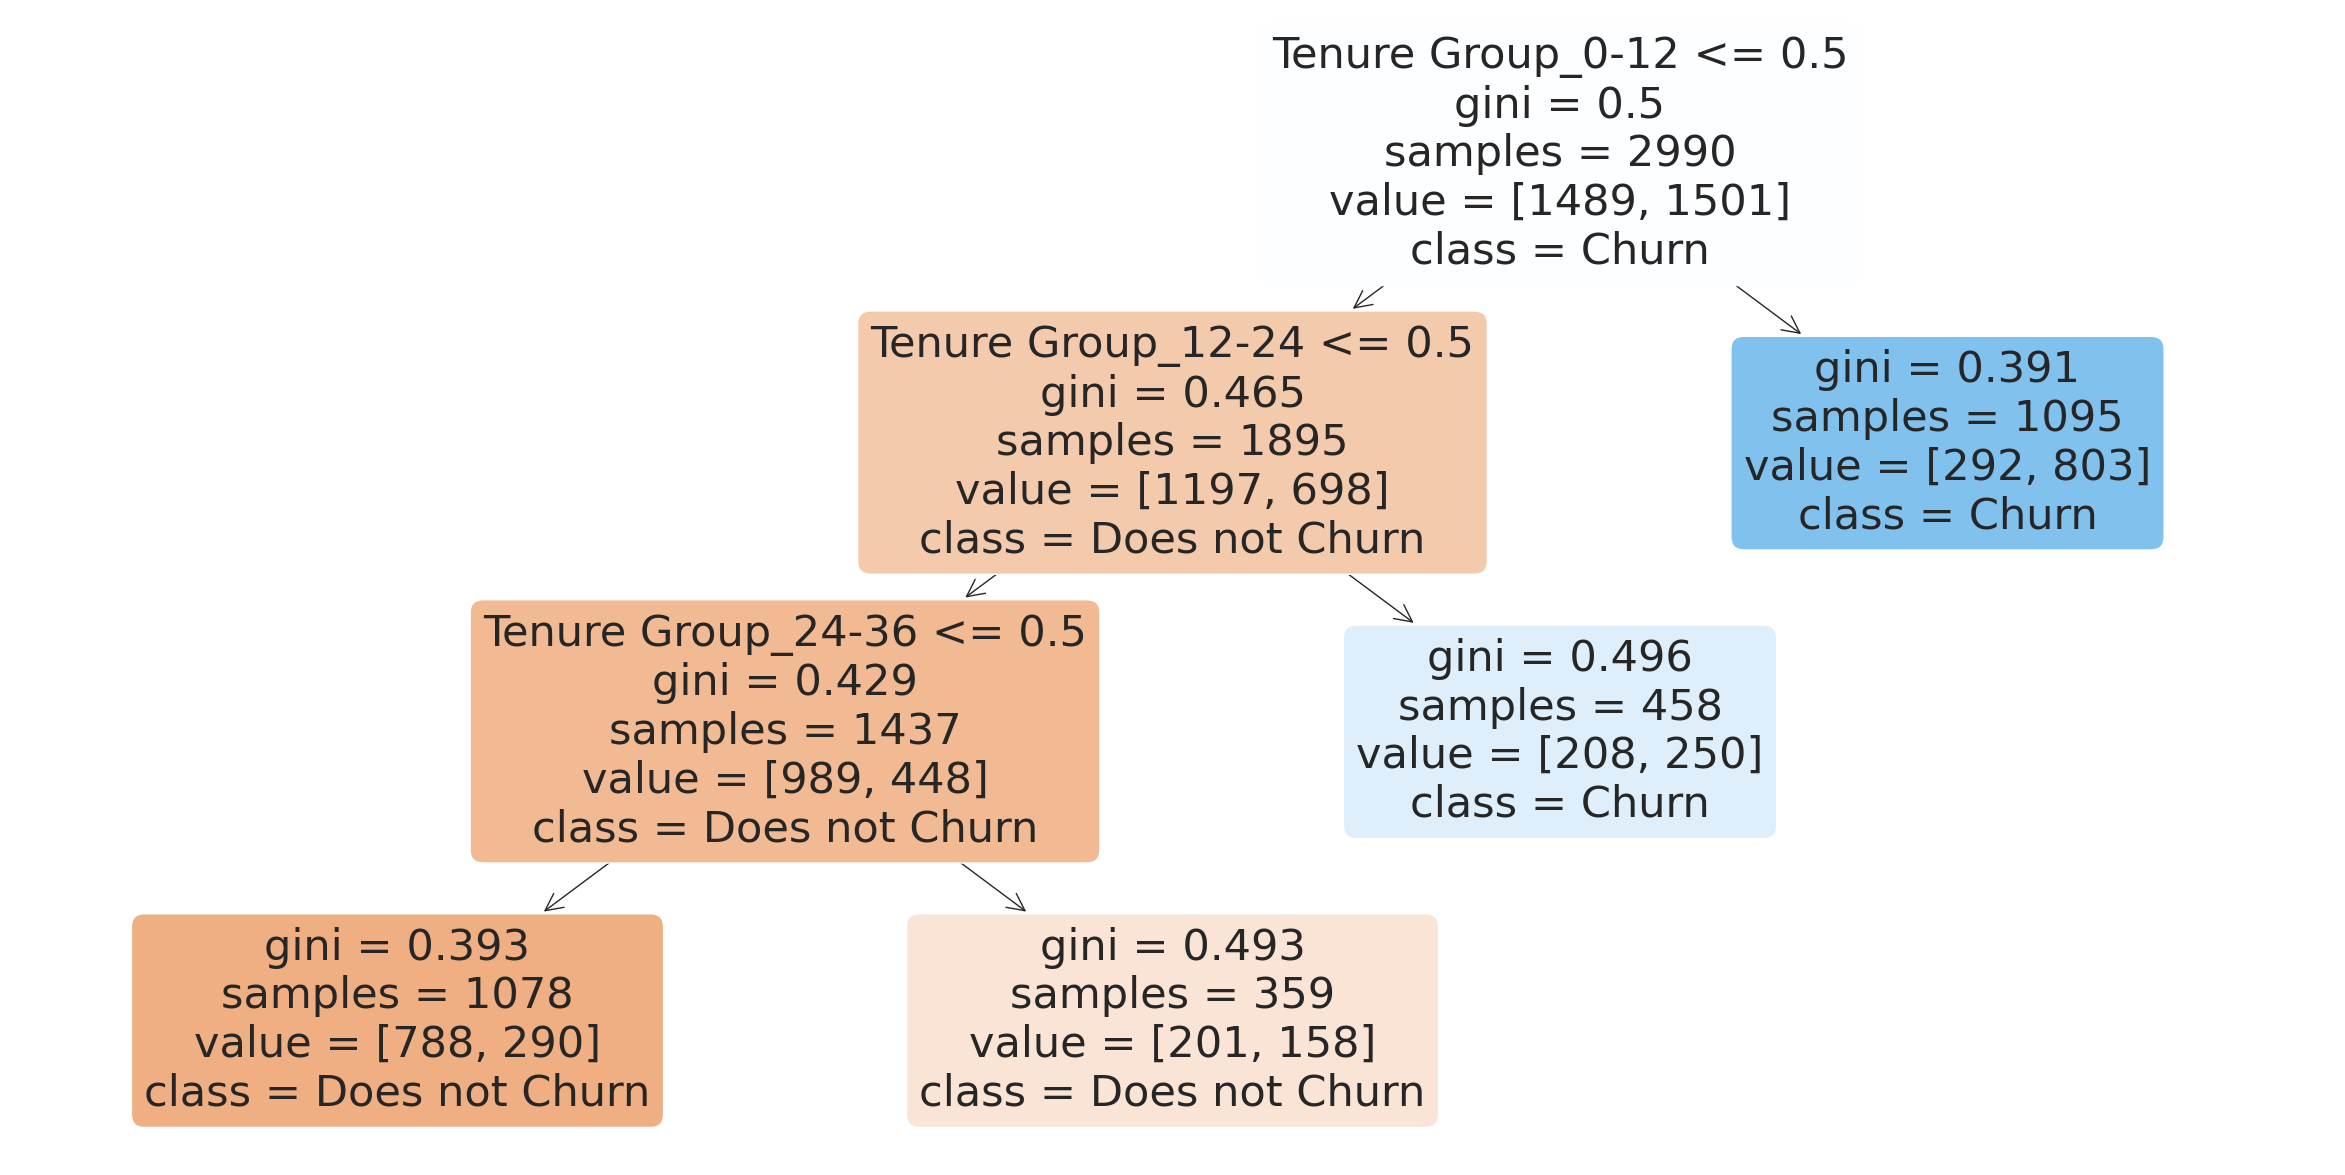

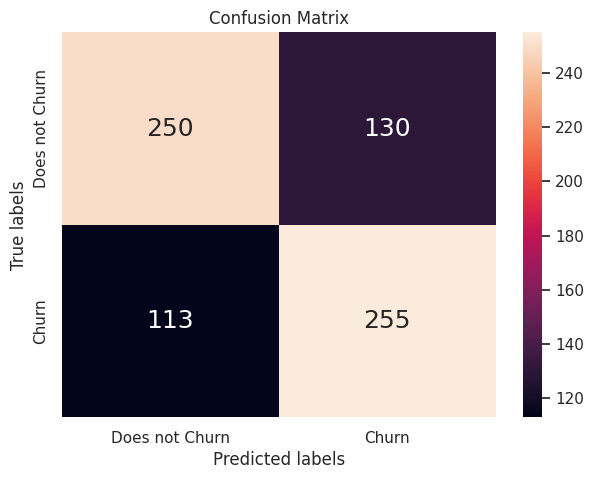

In [22]:
do_ct_cm(model_1_tenure_encoded, Churn)

**Logic:** The lower the Gini Index, the more confident the node is in predicting "Churn". The more the drop in Gini from a parent node to the children node, the better is the split. The tree automatically decides the best variables by splitting the tree using them. Thus, the higher the variable occurs
in a tree, the more important it is. 

**Conclusion:** `Tenure Group_0-12` is the most important in predicting "Churn" as compared to the other groups in Tenure as it occurs in the very first split of the tree and leads to the greatest improvement in Gini as seen from the children node where gini = 0.391 is the lowest amongst all leaf nodes.

In [41]:
print("Tenure Group_0-12 Model")
print()

# True Positive Rate = TP/(TP+FN)
print("True Positive Rate for Test Data \t:", 255 / (255 + 113))

# False Positive Rate = FP/(FP+TN)
print("False Positive Rate for Test Data \t:", 130 / (130 + 250))

Tenure Group_0-12 Model

True Positive Rate for Test Data 	: 0.6929347826086957
False Positive Rate for Test Data 	: 0.34210526315789475


### 3.4.3 - Categorical variable: OnlineSecurity

In [24]:
# find out the different 
os = df[['OnlineSecurity']]
os_col = pd.get_dummies(os)
os_col.columns

Index(['OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes'],
      dtype='object')

In [25]:
# Cleaning of data
Churn = pd.DataFrame(df_downsampled['Churn'])        # Response
model_1_os = df_downsampled[['OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes']]        # Predictor

model_1_os_encoded = pd.get_dummies(model_1_os)
model_1_os_encoded.head()

,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0



Classification Accuracy 	: 0.6737967914438503


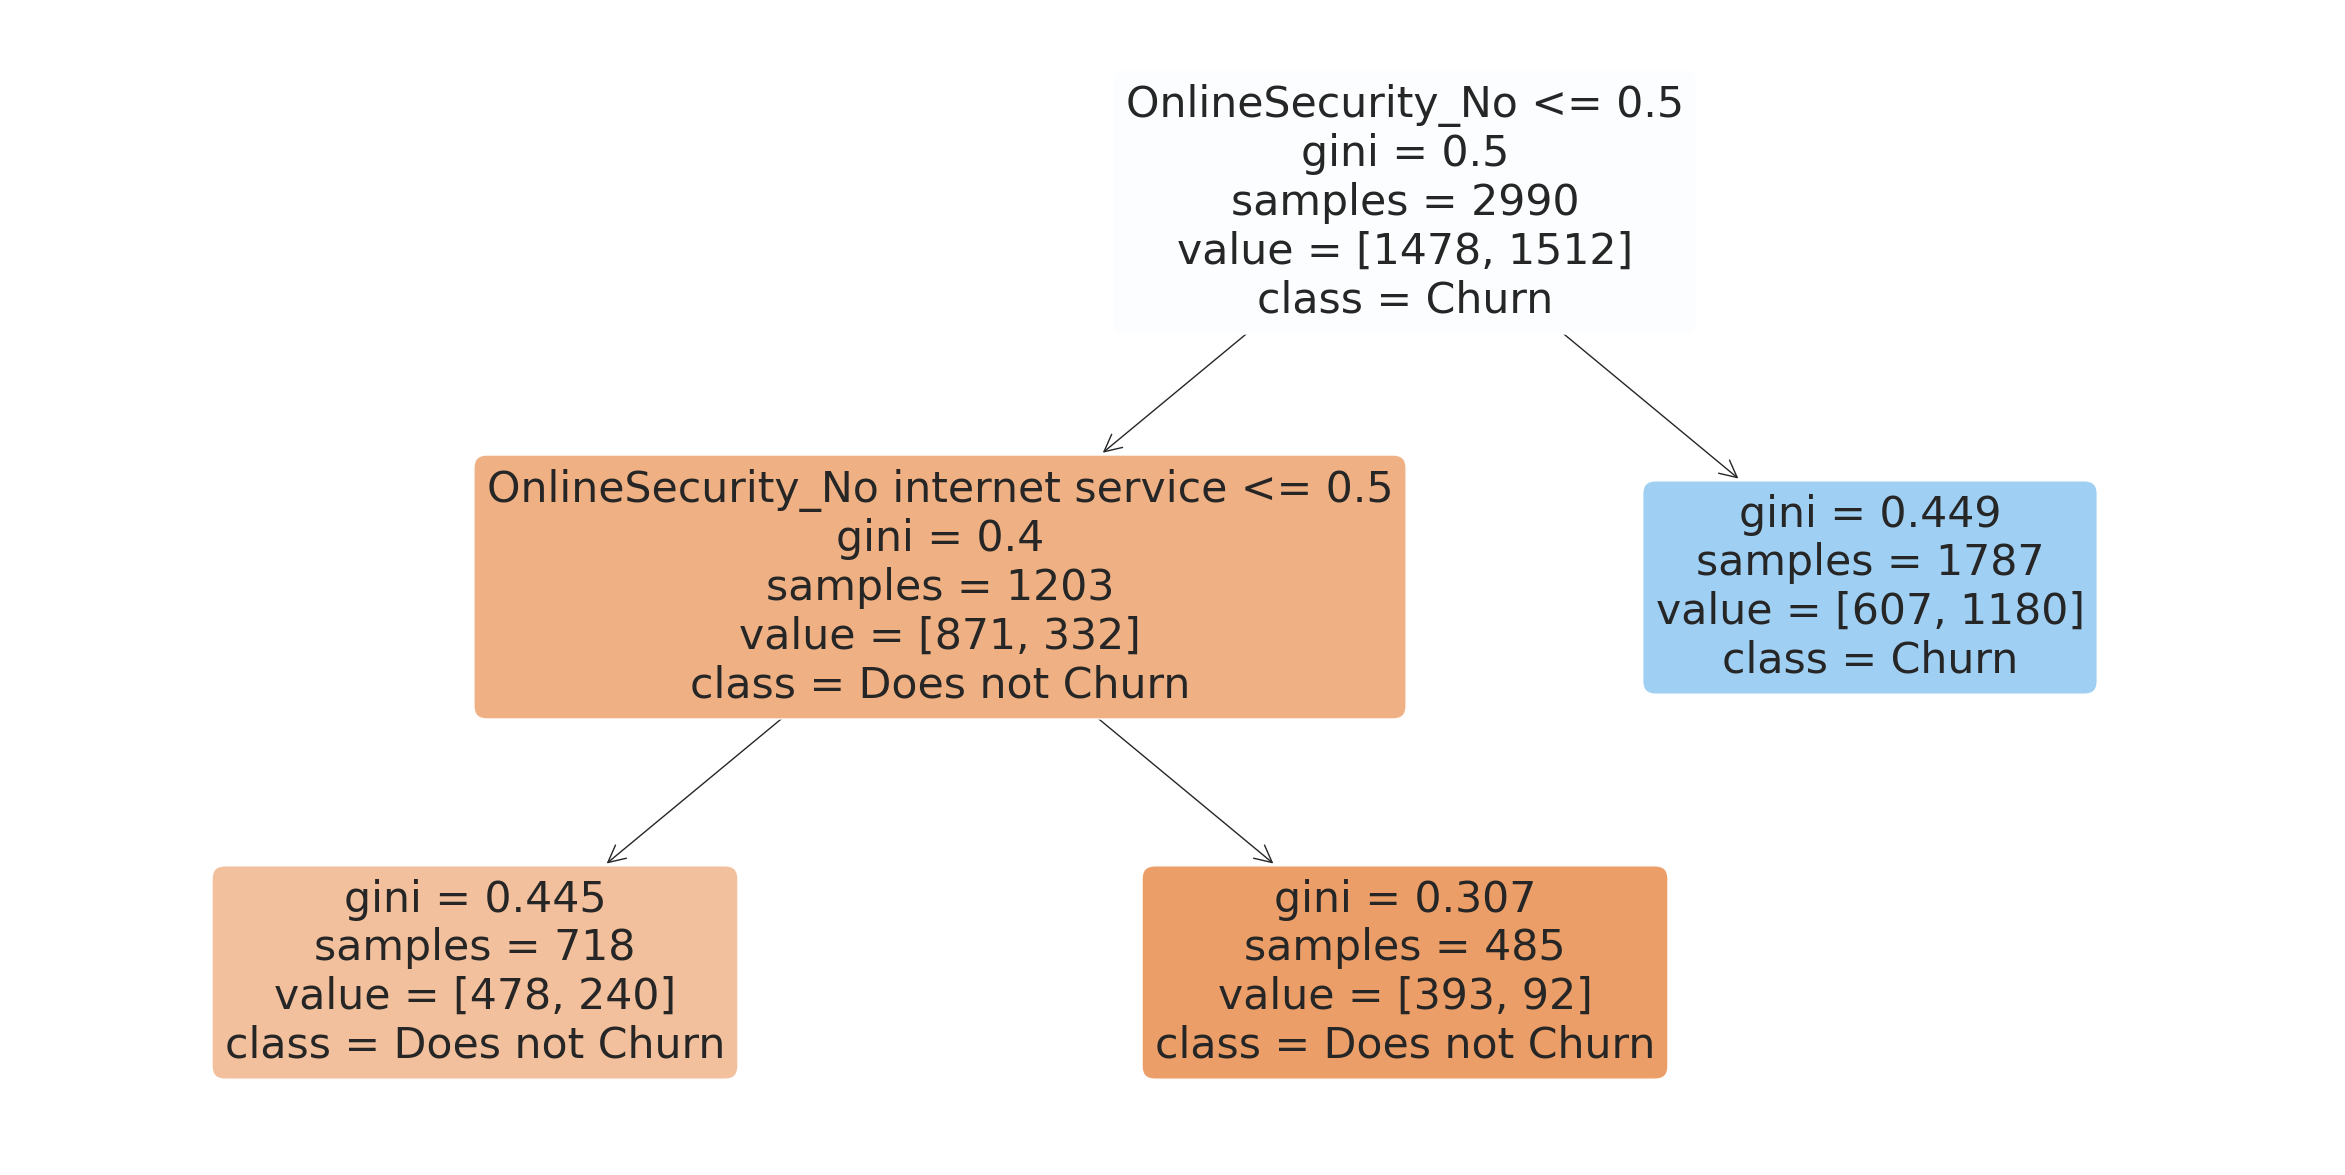

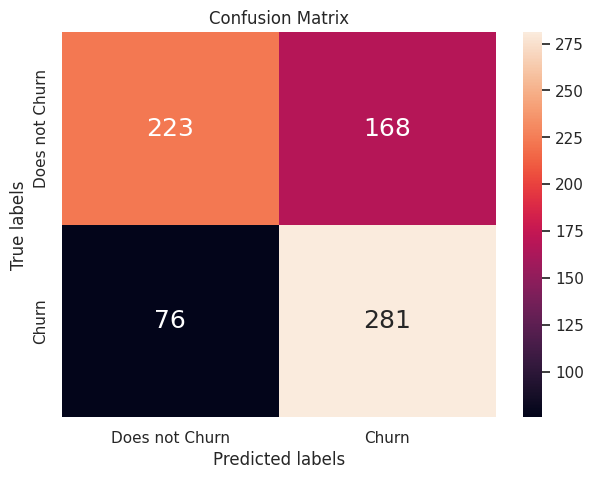

In [26]:
do_ct_cm(model_1_os_encoded, Churn)

**Logic:** The lower the Gini Index, the more confident the node is in predicting "Churn". The more the drop in Gini from a parent node to the children node, the better is the split. The tree automatically decides the best variables by splitting the tree using them. Thus, the higher the variable occurs
in a tree, the more important it is. 

**Conclusion:** `OnlineSecurity_No` is the most important in predicting "Churn" as compared to the other groups in OnlineSecurity as it occurs in the very first split of the tree and leads to the greatest drop in Gini as seen from the children node where gini = 0.4, a drop of 0.1 as compared to the parent node with Gini = 0.5.

In [40]:
print("OnlineSecurity_No Model")
print()

# True Positive Rate = TP/(TP+FN)
print("True Positive Rate for Test Data \t:", 281 / (281 + 76))

# False Positive Rate = FP/(FP+TN)
print("False Positive Rate for Test Data \t:", 168 / (168 + 223))

OnlineSecurity_No Model

True Positive Rate for Test Data 	: 0.7871148459383753
False Positive Rate for Test Data 	: 0.4296675191815857


### 3.4.4 - Categorical variable: OnlineBackup

In [28]:
# find out the different 
ob = df[['OnlineBackup']]
ob_col = pd.get_dummies(ob)
ob_col.columns

Index(['OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes'],
      dtype='object')

In [29]:
# Cleaning of data
Churn = pd.DataFrame(df_downsampled['Churn'])        # Response
model_1_ob = df_downsampled[['OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes']]        # Predictor

model_1_ob_encoded = pd.get_dummies(model_1_ob)
model_1_ob_encoded.head()

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0



Classification Accuracy 	: 0.6590909090909091


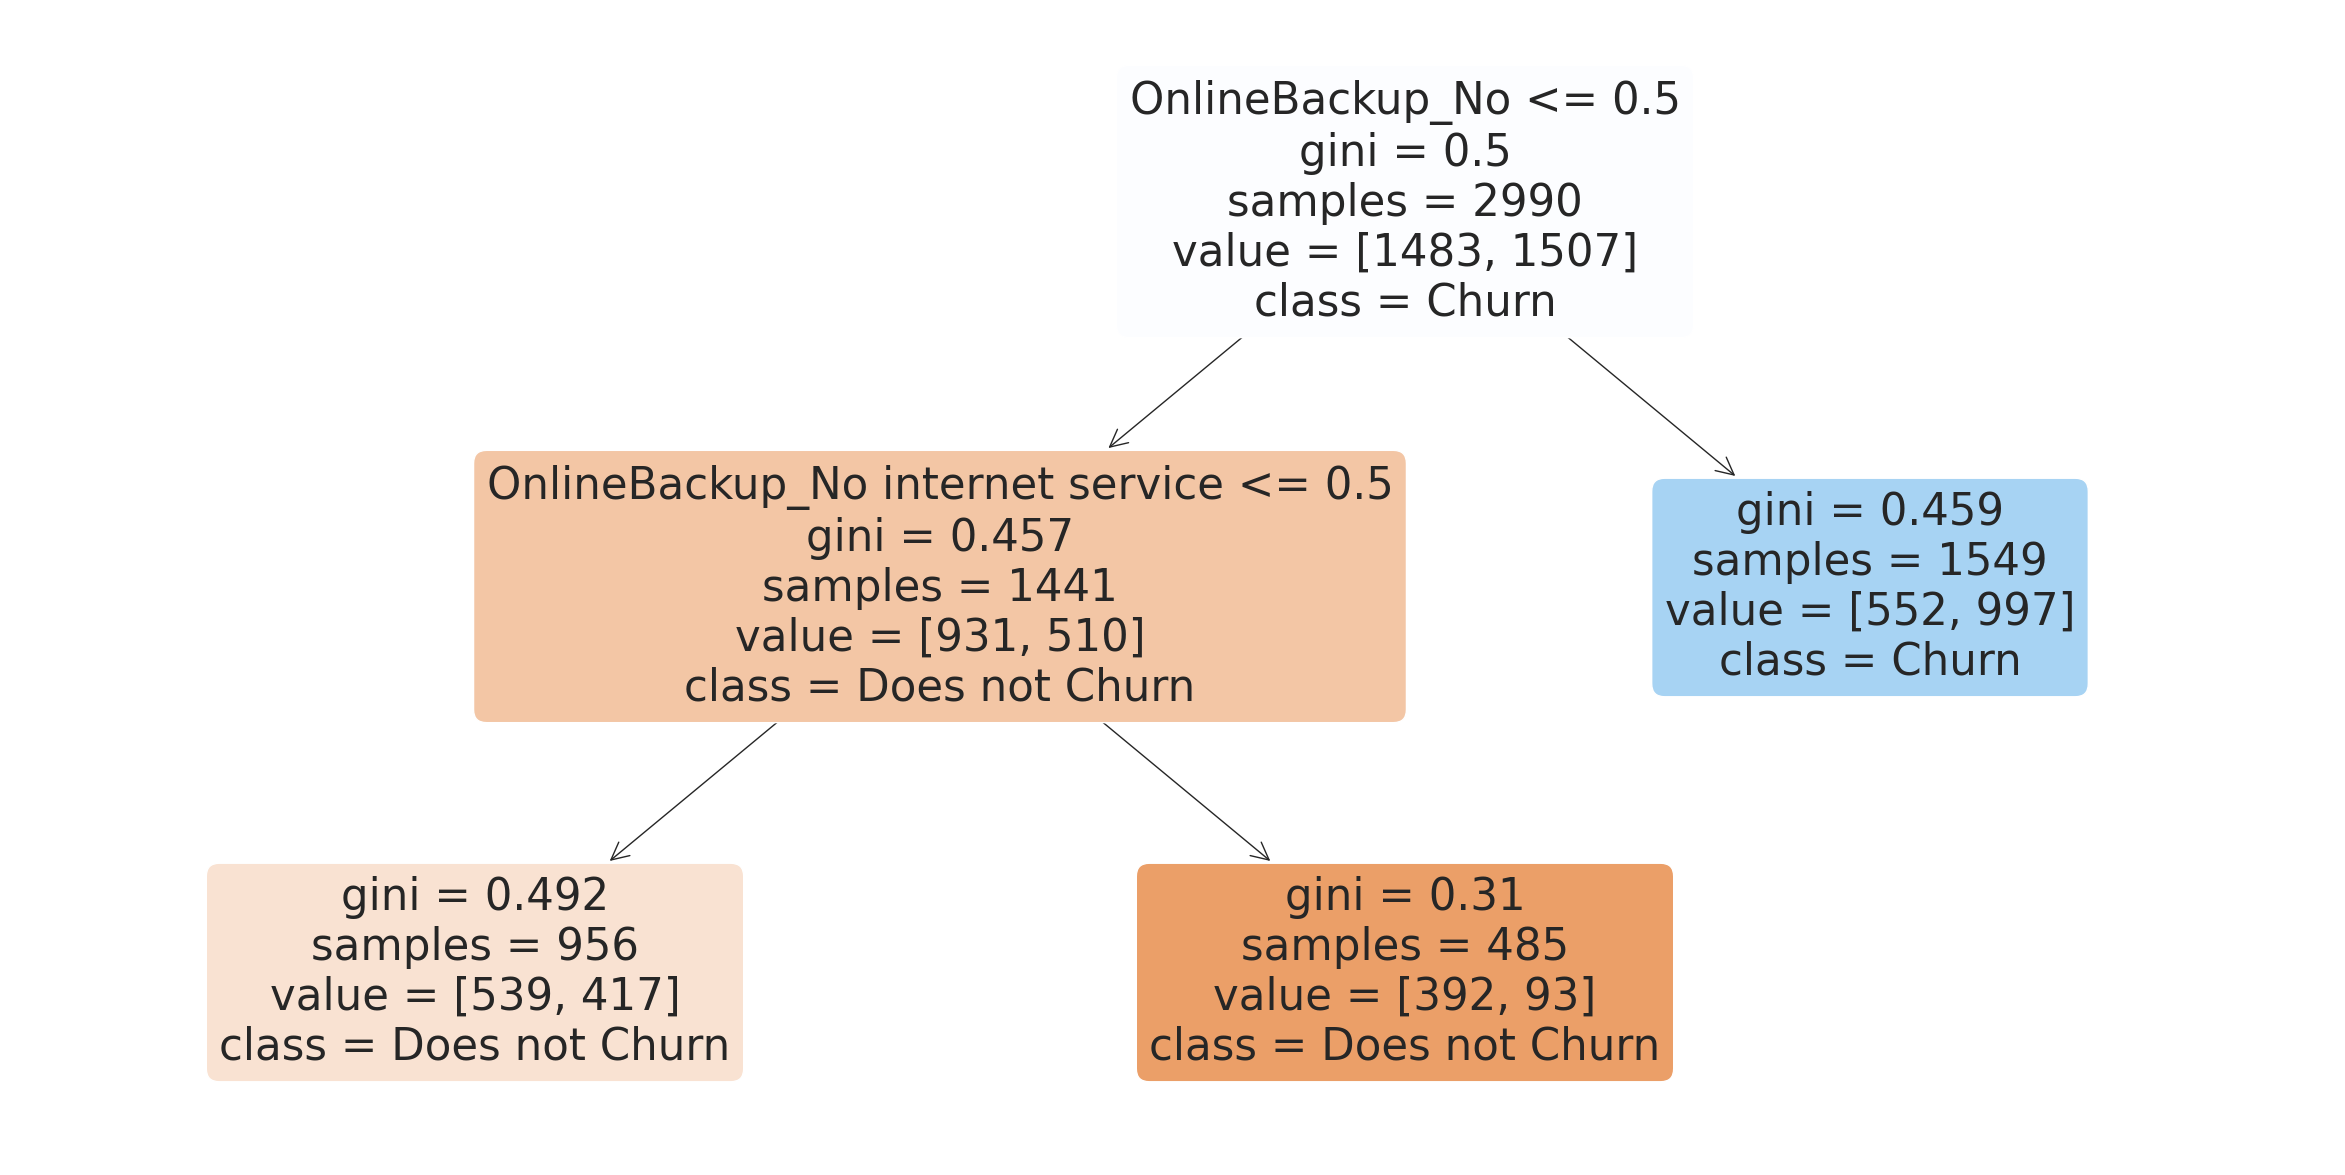

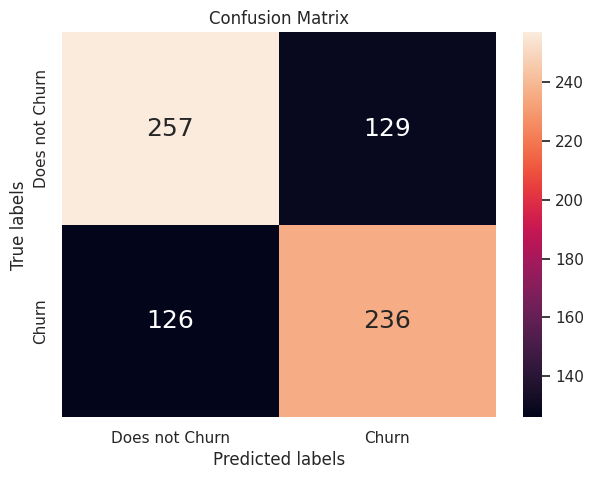

In [30]:
do_ct_cm(model_1_ob_encoded, Churn)

**Logic:** The lower the Gini Index, the more confident the node is in predicting "Churn". The more the drop in Gini from a parent node to the children node, the better is the split. The tree automatically decides the best variables by splitting the tree using them. Thus, the higher the variable occurs
in a tree, the more important it is. 

**Conclusion:** `OnlineBackup_No internet service` is the most important in predicting "Churn" as compared to the other groups in OnlineBackup as it occurs right after the first split of the tree and leads to the greatest drop in Gini as seen from the children node where gini = 0.31, a drop of 0.147 as compared to the parent node with Gini = 0.457.

In [43]:
print("OnlineBackup_No internet service Model")
print()

# True Positive Rate = TP/(TP+FN)
print("True Positive Rate for Test Data \t:", 236 / (236 + 126))

# False Positive Rate = FP/(FP+TN)
print("False Positive Rate for Test Data \t:", 129 / (129 + 257))

OnlineBackup_No internet service Model

True Positive Rate for Test Data 	: 0.6519337016574586
False Positive Rate for Test Data 	: 0.33419689119170987


### 3.4.5 - Categorical variable: TechSupport

In [44]:
# find out the different 
ts = df[['TechSupport']]
ts_col = pd.get_dummies(ts)
ts_col.columns

Index(['TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes'], dtype='object')

In [45]:
# Cleaning of data
Churn = pd.DataFrame(df_downsampled['Churn'])        # Response
model_1_ts = df_downsampled[['TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes']]        # Predictor

model_1_ts_encoded = pd.get_dummies(model_1_ts)
model_1_ts_encoded.head()

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0



Classification Accuracy 	: 0.6550802139037433


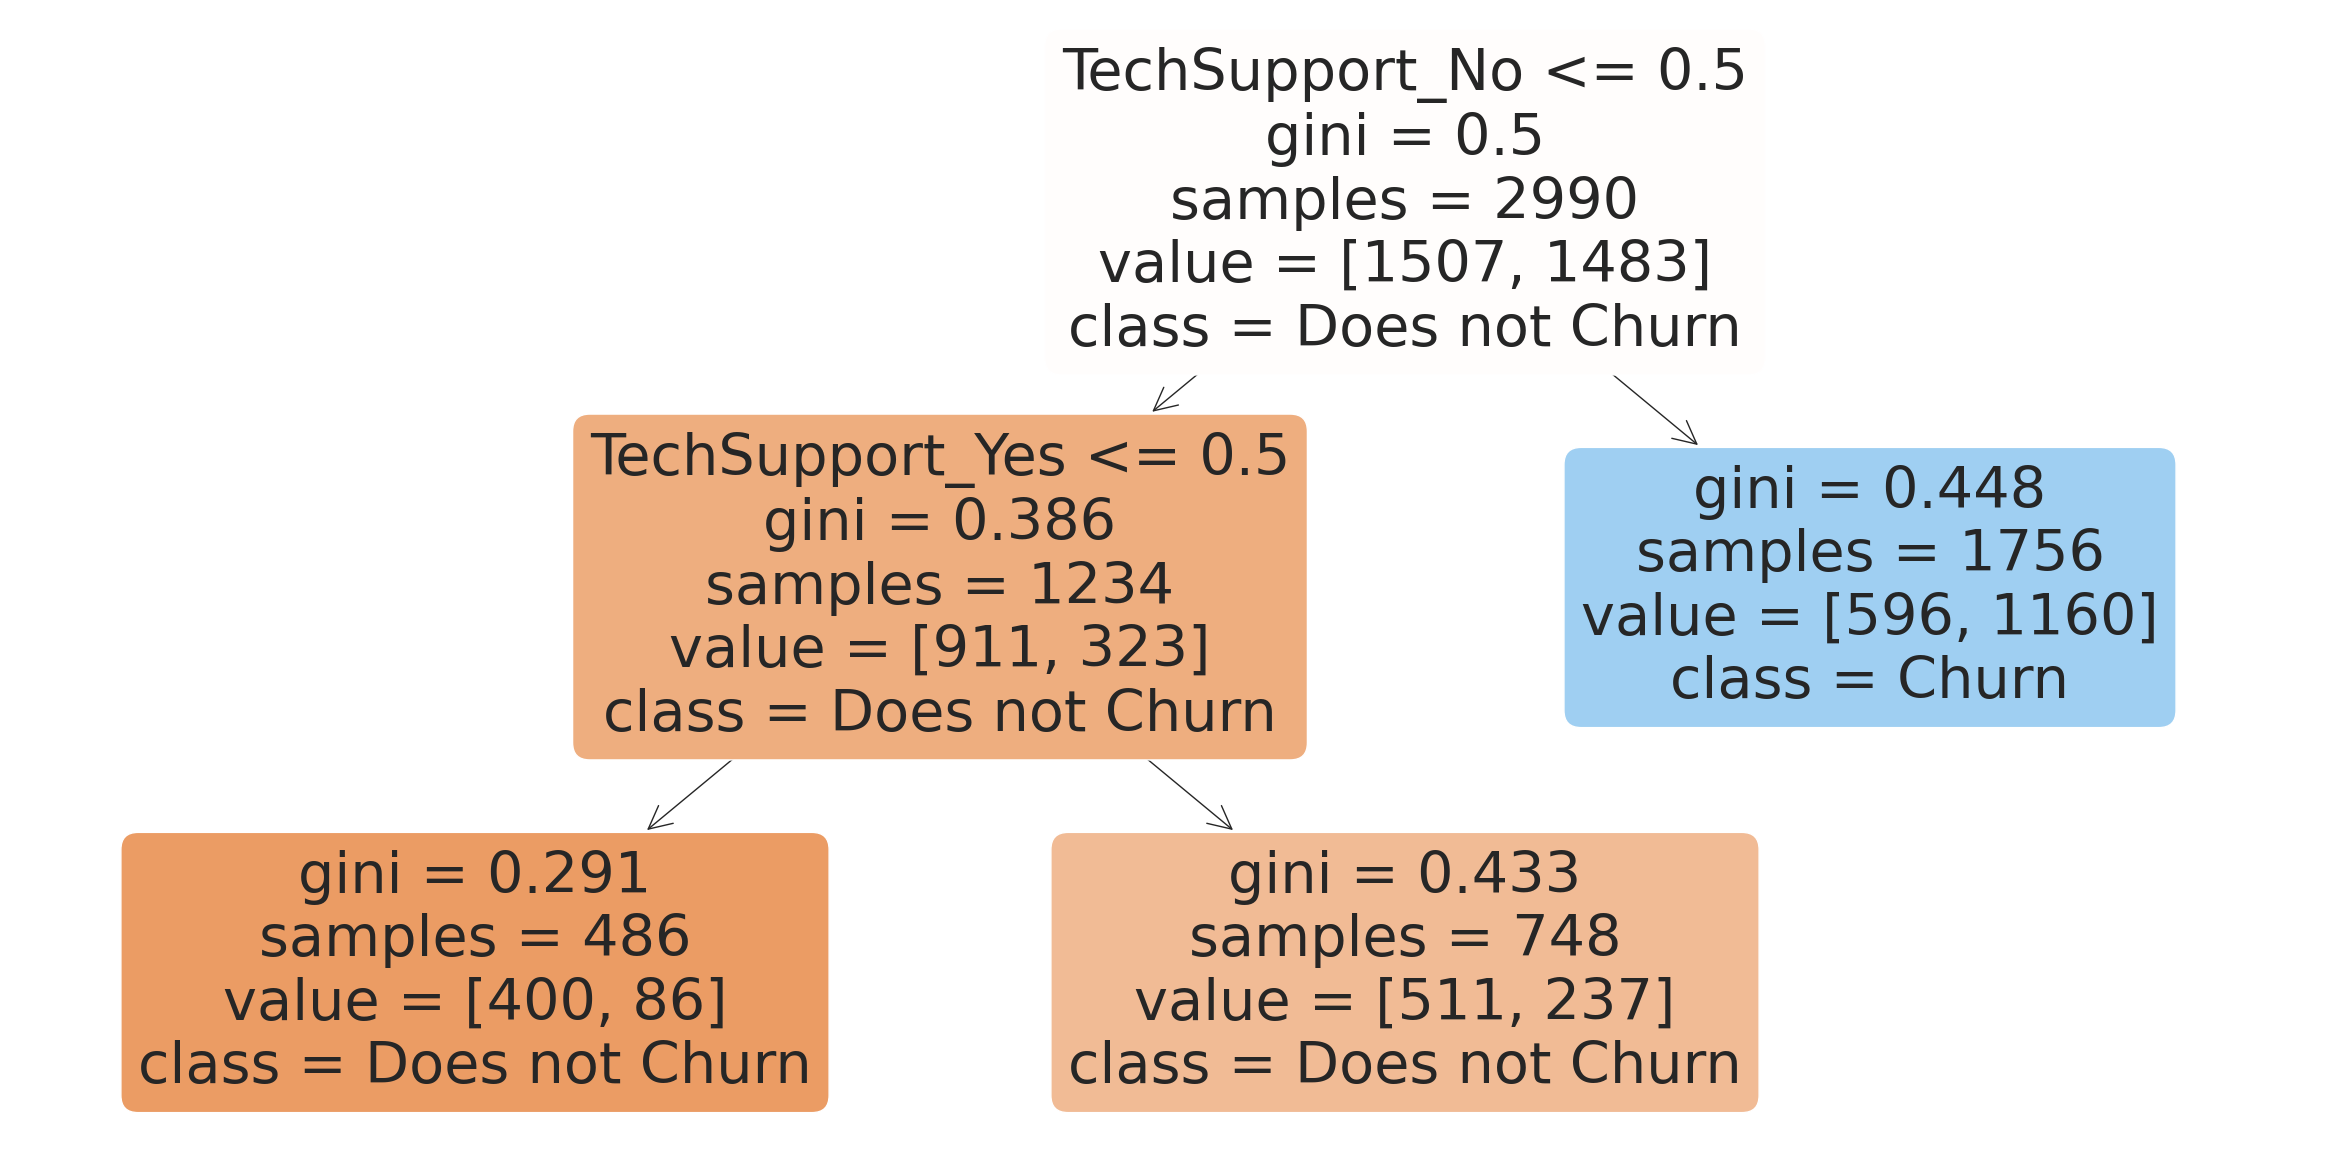

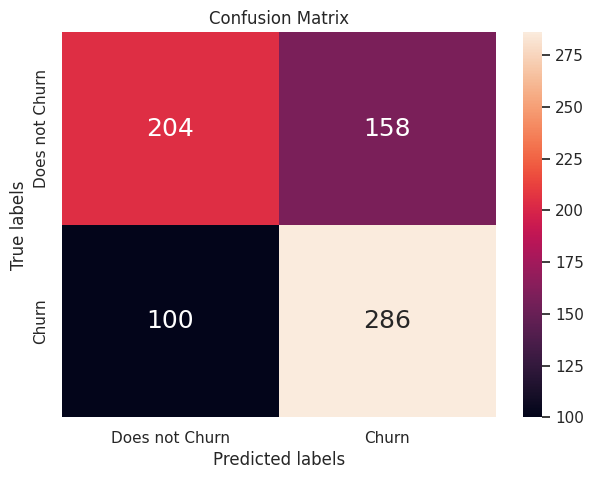

In [46]:
do_ct_cm(model_1_ts_encoded, Churn)

**Logic:** The lower the Gini Index, the more confident the node is in predicting "Churn". The more the drop in Gini from a parent node to the children node, the better is the split. The tree automatically decides the best variables by splitting the tree using them. Thus, the higher the variable occurs
in a tree, the more important it is. 

**Conclusion:** `TechSupport_No` is the most important in predicting "Churn" as compared to the other groups in TechSupport as it occurs in the very first split of the tree and leads to the greatest drop in Gini as seen from the children node where gini = 0.386, a drop of 0.114 as compared to the parent node with Gini = 0.5.

In [47]:
print("TechSupport_No Model")
print()

# True Positive Rate = TP/(TP+FN)
print("True Positive Rate for Test Data \t:", 286 / (286 + 100))

# False Positive Rate = FP/(FP+TN)
print("False Positive Rate for Test Data \t:", 158 / (158 + 204))

TechSupport_No Model

True Positive Rate for Test Data 	: 0.7409326424870466
False Positive Rate for Test Data 	: 0.43646408839779005


### 3.4.6 - Analysis of data

**Contract VS Churn**     
Goodness of Fit of Model     Test Dataset     
Classification Accuracy 	: 0.7473262032085561     
True Positive Rate 	    : 0.8976982097186701     
False Positive Rate 	: 0.4173669467787115


**Tenure VS Churn**   
Goodness of Fit of Model 	Test Dataset     
Classification Accuracy 	: 0.6751336898395722     
True Positive Rate 	    : 0.6929347826086957     
False Positive Rate 	: 0.34210526315789475

**OnlineSecurity VS Churn**   
Goodness of Fit of Model 	Test Dataset     
Classification Accuracy 	: 0.6737967914438503     
True Positive Rate 	    : 0.7871148459383753     
False Positive Rate 	: 0.429667519181585

**OnlineBackup VS Churn**   
Goodness of Fit of Model 	Test Dataset     
Classification Accuracy 	: 0.6590909090909091     
True Positive Rate 	    : 0.6519337016574586     
False Positive Rate 	: 0.33419689119170987


**TechSupport VS Churn**   
Goodness of Fit of Model 	Test Dataset     
Classification Accuracy 	: 0.6550802139037433     
True Positive Rate 	    : 0.7409326424870466     
False Positive Rate 	: 0.43646408839779005

**Conclusion:** Combining the results of the classification tree, classification accuracy and confusion matric, Contract_Month-to-month is the most accurate in predicting whether a customer "Churns", followed by Contract_Two year. The model used to predict "Churn" by using Contract as predictors has the highest classification accuracy and the highest True Positive Rate among the other categorical variables used to predict "Churn". The model also has a relatively low False Positive Rate. Hence, `Contract_Month-to-month` is the most accurate in predicting whether a customer "Churns", followed by `Contract_Two year`.

## 3.5 - Model 2: Comparison between all variables and Churn

In [62]:
# Cleaning of data
Churn = pd.DataFrame(df_downsampled['Churn'])        # Response
model_2 = df_downsampled.loc[:, df_downsampled.columns != 'Churn']      # Predictor

model_2_encoded = pd.get_dummies(model_2, dtype = int)
model_2_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,MonthlyCharges Group_18.4 - 38.47,MonthlyCharges Group_38.47 - 58.54,MonthlyCharges Group_58.54 - 78.61,MonthlyCharges Group_78.61 - 98.68,MonthlyCharges Group_98.68 - 118.75,TotalCharges Group_18.8 - 1752.0,TotalCharges Group_1752.0 - 3485.2,TotalCharges Group_3485.2 - 5218.4,TotalCharges Group_5218.4 - 6951.6,TotalCharges Group_6951.6 - 8684.8
0,0,29,75.30,2263.40,0,1,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0,55,55.25,3119.90,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,3,24.75,66.95,0,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,37,36.65,1315.00,0,1,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0,53,85.45,4517.25,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0



Classification Accuracy 	: 0.7232620320855615


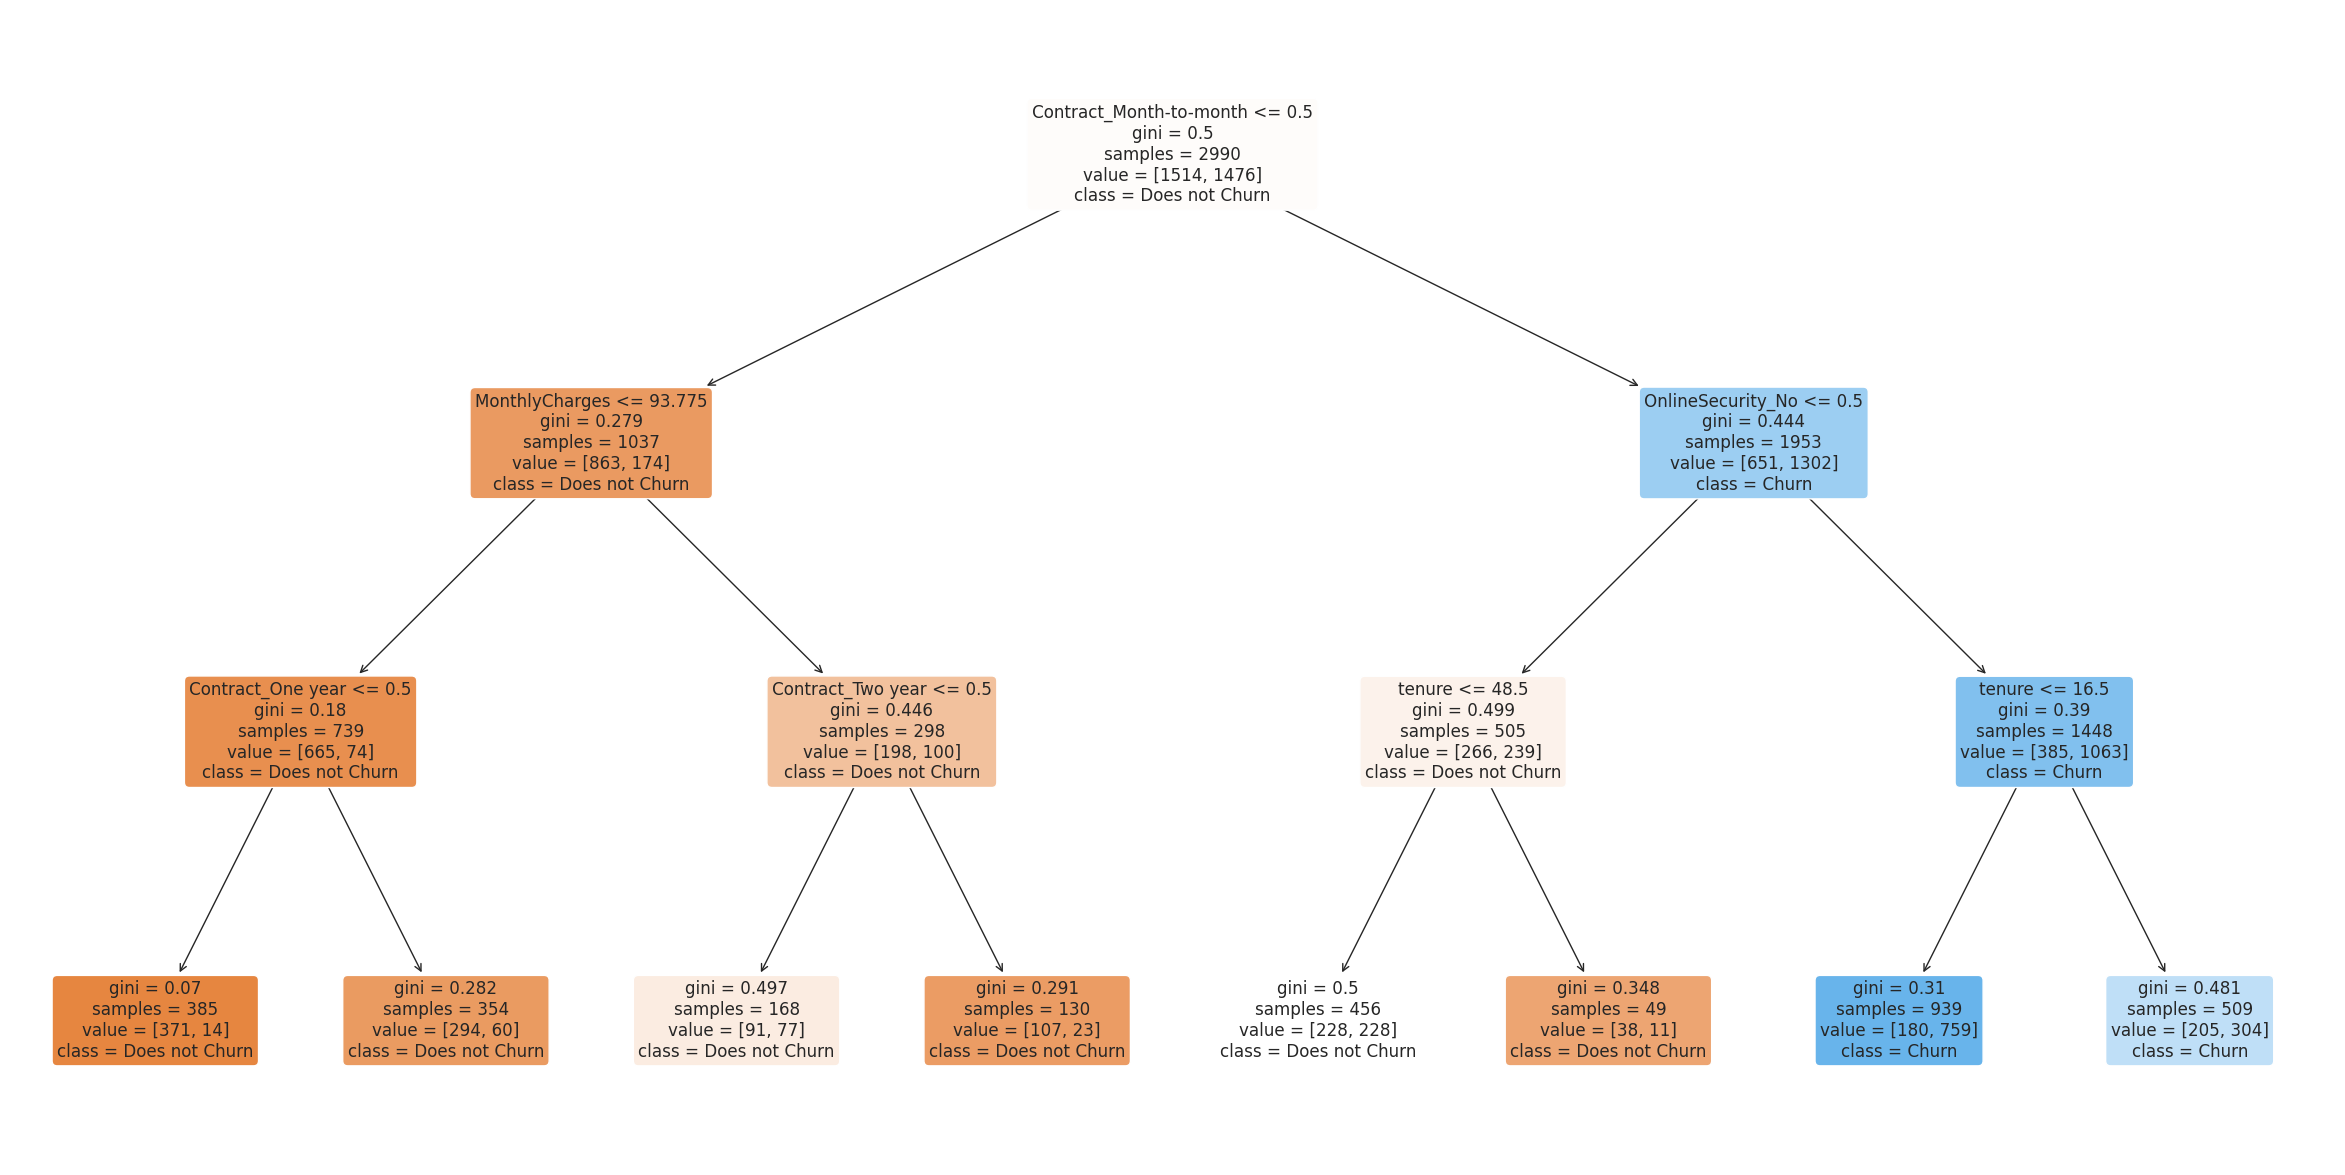

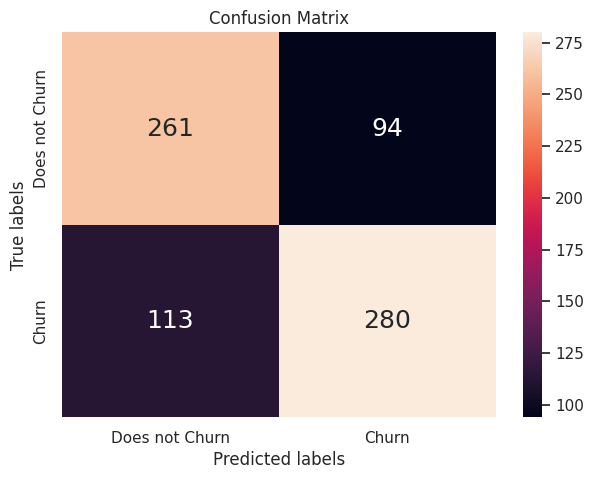

In [71]:
do_ct_cm(model_2_encoded, Churn)

In [72]:
print("Model 2")
print()

# True Positive Rate = TP/(TP+FN)
print("True Positive Rate \t:", 280 / (280 + 113))

# False Positive Rate = FP/(FP+TN)
print("False Positive Rate \t:", 94 / (94 + 261))

Model 2

True Positive Rate 	: 0.712468193384224
False Positive Rate 	: 0.2647887323943662


## 3.6 - Summary of Machine Learning

Although the classification accuracy for the model for comparison between all variables and Churn is slightly higher than most models built based on the top 5 most correlated variables to Churn, as seen in the Correlation graph, the classification tree for Model 2: Comparison between all variables and Churn is much more complicated when comparing the individual variables to Churn, thus harder to sieve out the important variables to predict Churn. 

Furthermore, the classification accuracy for Contract, the model that is most accurate in predicting Churn, is higher than that of Model 2: Comparison between all variables. Hence, models built based on the correlated graph is better in predicting which variables are accurate in predicting Churn.

## 3.7 - Recommendation

Based on our classification tree, It is recommended for telco companies to offer discount to attract customers to choose a two year contract as it has a negative relation with Churn and is fairly accurate in predicting Churn. Discount can also be offered to those who choose one year contract so more customers will be bound by contract.

In the mean time, in order to increase their customer retention level, companies can include features such as online backup and online security.

Lastly, it was no surprise that contract term is most accurate in predicting Churn as this signifies this measures customer loyalty. Having a short contract term will provide them with the greatest convenience to change telco companies whenever a more attractive contract is shown to them.

Companies can add in a time series to track the customer's information over time so as to increase the accuracy of the prediction and helping companies make more informed decisions and improve their business model. 